
<h1> Prediction of the Prices of Toyota Corolla <span class="tocSkip"></span></h1>

<h2> Business Case <span class="tocSkip"></span></h2>


The CEO from Toyota Barcelona has contacted us because they are interested in having a model to predict the prices of different Corolla models that they are selling. 

    Right now, they have developed and algorithm that has an error of 50%, so they are not feeling really confident with their results. They have contacted us because they are interested in having a model with better Accuracy. Can you help them?
    
> Dataset: https://www.kaggle.com/tolgahancepel/toyota-corolla

<h2> Overview <span class="tocSkip"></span></h2>

Columns:
- <b> Age: </b> Age in years
- <b> KM: </b> Accumulated Kilometers on odometer
- <b> FuelType: </b> Fuel Type (Petrol, Diesel, CNG)
- <b> HP: </b> Horse Power
- <b> MetColor: </b> Metallic Color? (Yes=1, No=0)
- <b> Automatic: </b> Automatic ( (Yes=1, No=0)
- <b> CC: </b> Cylinder Volume in cubic centimeters
- <b> Doors: </b> Number of doors
- <b> Weight: </b> Weight in Kilograms
- <b> Price: </b> Offer Price in EUROs


# Import the Libraries and Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:

import sys
sys.path.insert(0, '/Users/agieen/Downloads/AllWomen/_functions_')
from functions_plot_EDA import *
from fx_MLRegression import *


In [3]:
dataset = pd.read_csv('../../datasets/Students_turn/Ex3.1.ToyotaCorolla.csv')
dataset.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [4]:
dataset.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015
1435,6950,76,1,Petrol,110,0,0,1600,5,1114


# Clean the Dataset

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
MetColor,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
CC,1436.0,1566.827994,187.182436,1300.0,1400.0,1600.0,1600.00,2000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [7]:
dataset.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [8]:
data=dataset.copy()

In [9]:
data.describe().loc[['min','max']].T

,min,max
Price,4350.0,32500.0
Age,1.0,80.0
KM,1.0,243000.0
HP,69.0,192.0
MetColor,0.0,1.0
Automatic,0.0,1.0
CC,1300.0,2000.0
Doors,2.0,5.0
Weight,1000.0,1615.0


In [10]:
data.duplicated().sum()

1

In [11]:
data[data.duplicated(keep=False)]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
112,24950,8,13253,Diesel,116,1,0,2000,5,1320
113,24950,8,13253,Diesel,116,1,0,2000,5,1320


In [12]:
data.drop_duplicates(keep = False, inplace = True) 
data.duplicated().sum()

0

In [13]:
for col in data.columns:
    OutLiersBox(data,col)

There are no suspicious outliers, the dataset seems to be well-balanced

## Scatter plot of the variables against the target:

In [14]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

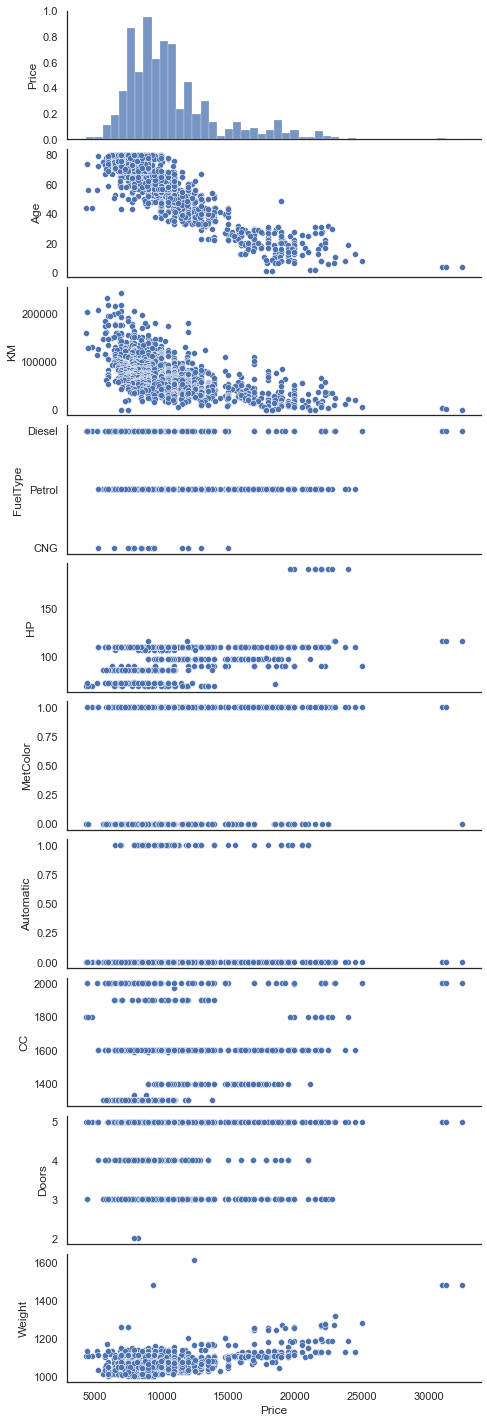

In [15]:
g=sns.pairplot(data, y_vars= data.columns.values, x_vars='Price')
g.fig.set_size_inches(10,20)

Observations:
- strong negative linear correlation with Age 
- weak negatice with KM
- weak positive correlation with Weight

In [16]:
# Correlation Matrix:
corrMatrix(data, 'viridis')

# Linear Regression


<h2> Step 1: Define the target variable  <span class="tocSkip"></span></h2>


In [17]:
X = data['Age'] 
y = data['Price'] # target

<h2> Step 2: Split the data into train and test set<span class="tocSkip"></span></h2>



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [19]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (1434,)
Shape of the TARGET variable (y): (1434,)

Shape of the Train data (X_train): (1003,)
Shape of the Train data (y_train): (1003,)

Shape of the Test data (X_test): (431,)
Shape of the TARGET Test data (y_test): (431,)


In [20]:
# Convert values to a numpy array:

y_train = np.array(y_train).reshape(-1, 1)

X_train = np.array(X_train).reshape(-1, 1)

y_test = np.array(y_test).reshape(-1, 1)

X_test = np.array(X_test).reshape(-1, 1)

<h2>Step 3-4: Instantiate and fit the model<span class="tocSkip"></span></h2>



In [21]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(normalize=True)

<h2>Step 5: Evaluate the model<span class="tocSkip"></span></h2>



In [22]:
print('Intercept of the Linear Model', lm.intercept_)

Intercept of the Linear Model [20054.34733919]


In [23]:
print(lm.coef_)

[[-166.66394324]]


In [24]:
accuracy = lm.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.7484189683474327


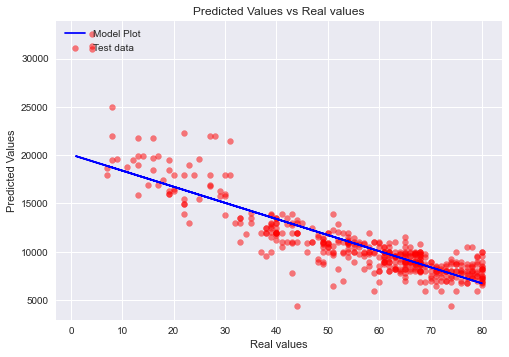

In [25]:
# Scatter plot - Predicted values vs Real Values

plt.style.use('seaborn')
plt.scatter(X_test, y_test, color = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.plot(X_train, lm.predict(X_train), color = 'blue', label='Model Plot')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [26]:

# Predictions of the test set:


y_pred = lm.predict(X_test)
y_pred = np.array(y_pred).reshape(-1, 1) 
#y_pred

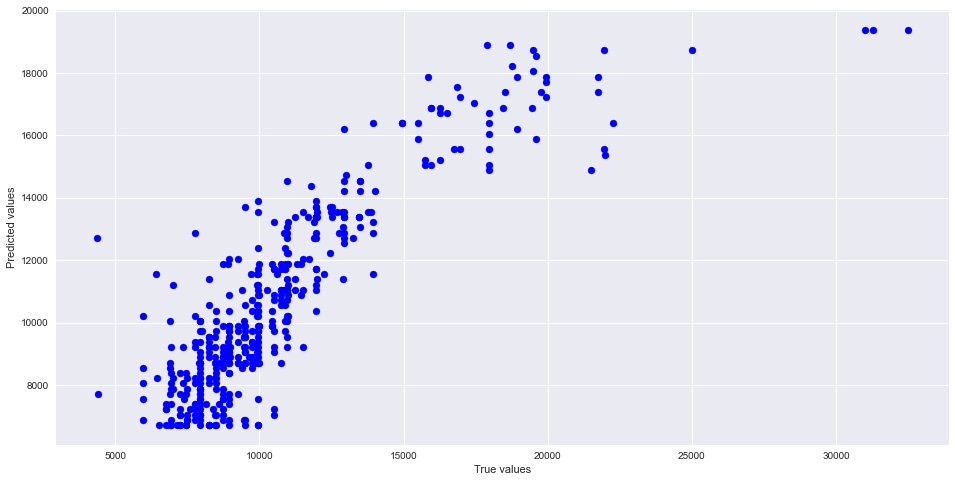

In [27]:
# Scatter plot of the predictions vs the real values:

plt.figure(figsize= (16,8))
plt.scatter(y_test, y_pred, color = 'blue')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

In [28]:
df = pd.DataFrame({'Real': y_test.flatten(), 
                   'Predicted': y_pred.flatten()})
df[0:10]

,Real,Predicted
0,13500,14554.437212
1,10850,12887.797780
2,9500,9054.527085
3,12995,14721.101156
4,8250,6721.231880
5,6950,8387.871313
6,7950,8054.543426
7,9950,9221.191029
8,5950,8554.535256
9,6900,7721.215540


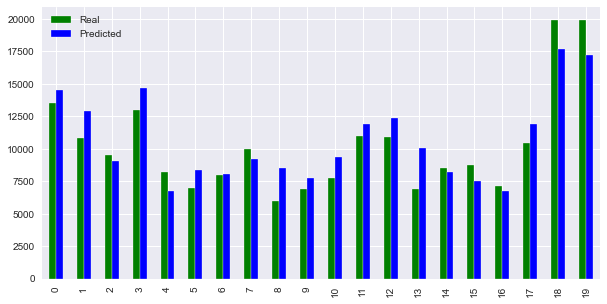

In [29]:
# Bar plot - Predicted values vs Real values

dff = df.head(20)
dff.plot(kind='bar',figsize=(10,5), color=['green', 'blue'])
plt.show()

In [30]:
df1 = df.mean()
df1

Real         10732.174014
Predicted    10758.288881
dtype: float64

In [31]:
lm_metrics = metrics_train(X_train, y_train, lm)
lm_metrics

,MAE,MSE,RMSE,R2,CV_R2
Train,1230.252054,2.733150e+06,1653.22416,0.776469,0.768


In [32]:
lm_metrics_test = metrics_test(X_test, y_test, lm)
lm_metrics_test

,MAE,MSE,RMSE,R2
Test,1223.240965,3.623817e+06,1903.632534,0.748419


In [33]:
all_metr = Allmetrics(lm, X_train, y_train, X_test, y_test)
all_metr

,MAE,MSE,RMSE,R2,CV_R2
Train,1230.252054,2.733150e+06,1653.224160,0.776469,0.768
Test,1223.240965,3.623817e+06,1903.632534,0.748419,NaN


<h2>Cross Validation <span class="tocSkip"></span></h2>




In [34]:
lm_ = LinearRegression()

cv_scores = cross_val_score(lm_, X_train, y_train, cv=10, scoring='r2')

cv_scores

array([0.80280678, 0.82870715, 0.81492921, 0.78581259, 0.73453359,
       0.7622183 , 0.79390292, 0.79363831, 0.73060504, 0.63262437])

In [35]:
print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.8  0.83 0.81 0.79 0.73 0.76 0.79 0.79 0.73 0.63]

Average 10-Fold CV R2_score: 0.768


The accuracy of the Linear Regression model is around 77%. Let's check if we can improve the accuracy by applying the Multilinear model

# Multilinear Regression

<h2>Choose the variables and split the data into Train and Test <span class="tocSkip"></span></h2>



In [36]:
data.columns


Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [37]:
features = ['Age', 'KM', 'Weight']
target = ['Price']

In [38]:
X = data[features]
y = data[target]

In [39]:
# Splitting the data into Train and Test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [40]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (1434, 3)
Shape of the TARGET variable (y): (1434, 1)

Shape of the Train data (X_train): (1003, 3)
Shape of the Train data (y_train): (1003, 1)

Shape of the Test data (X_test): (431, 3)
Shape of the TARGET Test data (y_test): (431, 1)


<h2>Instantiate and fit the model<span class="tocSkip"></span></h2>

In [41]:
from sklearn.linear_model import LinearRegression


mReg = LinearRegression()
mReg.fit(X_train, y_train)


LinearRegression()

<h2>Evaluate the model<span class="tocSkip"></span></h2>

In [42]:
print('Intercept of the Linear model', mReg.intercept_)
print(mReg.coef_)

Intercept of the Linear model [2226.82460588]
[[-1.24943703e+02 -2.19356524e-02  1.58590700e+01]]


In [43]:
mReg_metr = Allmetrics(mReg, X_train, y_train, X_test, y_test)
mReg_metr

,MAE,MSE,RMSE,R2,CV_R2
Train,1015.826926,2.009318e+06,1417.504128,0.835668,0.826
Test,1009.130757,2.034436e+06,1426.336706,0.858761,NaN


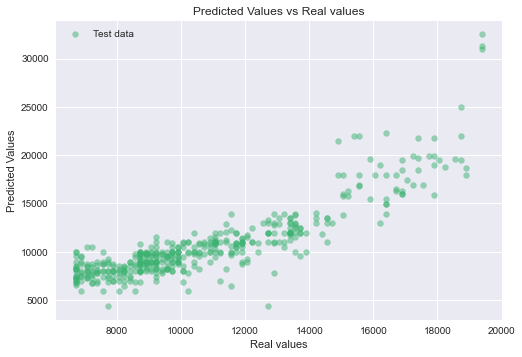

In [44]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()



The accuracy increased from 77% to 83%

# **Polynomial Regression - 2nd degree**


In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y_train)

LinearRegression()

In [47]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly = cross_val_score(estimator = regressor_poly, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly_train = regressor_poly.predict(poly_reg.fit_transform(X_train))
r2_score_poly_train = r2_score(y_train, y_pred_poly_train)

# Predicting R2 Score the Test set results
y_pred_poly_test = regressor_poly.predict(poly_reg.fit_transform(X_test))
r2_score_poly_test = r2_score(y_test, y_pred_poly_test)

# Predicting RMSE the Test set results
rmse_poly = (np.sqrt(mean_squared_error(y_test, y_pred_poly_test)))
print('CV: ', cv_poly.mean())
print('R2_score (train): ', r2_score_poly_train)
print('R2_score (test): ', r2_score_poly_test)
print("RMSE: ", rmse_poly)

CV:  0.8260388908493214
R2_score (train):  0.875651074764144
R2_score (test):  0.9114222394019197
RMSE:  1129.5527565048899


## Polynomial Regression - 2 variables

In [48]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [49]:
feat = ['Age', 'KM']
targ = ['Price']

In [50]:
X = data[feat]
y = data[targ]

In [51]:
poly_reg2 = PolynomialFeatures(degree = 2)

X_poly2 = poly_reg2.fit_transform(X)
X_poly2

array([[1.00000000e+00, 2.30000000e+01, 4.69860000e+04, 5.29000000e+02,
        1.08067800e+06, 2.20768420e+09],
       [1.00000000e+00, 2.30000000e+01, 7.29370000e+04, 5.29000000e+02,
        1.67755100e+06, 5.31980597e+09],
       [1.00000000e+00, 2.40000000e+01, 4.17110000e+04, 5.76000000e+02,
        1.00106400e+06, 1.73980752e+09],
       ...,
       [1.00000000e+00, 7.10000000e+01, 1.70160000e+04, 5.04100000e+03,
        1.20813600e+06, 2.89544256e+08],
       [1.00000000e+00, 7.00000000e+01, 1.69160000e+04, 4.90000000e+03,
        1.18412000e+06, 2.86151056e+08],
       [1.00000000e+00, 7.60000000e+01, 1.00000000e+00, 5.77600000e+03,
        7.60000000e+01, 1.00000000e+00]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_poly2, y, test_size = 0.3, random_state = 0)

In [53]:
lin_reg_pol = LinearRegression()

lin_reg_pol.fit(X_train, y_train)

LinearRegression()

In [54]:
accuracy = lin_reg_pol.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8008956316643604


In [55]:
poly_2 = Allmetrics(lin_reg_pol, X_train, y_train, X_test, y_test)

poly_2

,MAE,MSE,RMSE,R2,CV_R2
Train,1056.679437,2.198903e+06,1482.869714,0.841747,0.836
Test,1028.743247,2.082946e+06,1443.241512,0.800896,NaN


In this case, the accuracy is slightly higher - around 84%

# SVM

In [56]:
X = data[features]
y = data[target]

In [57]:
X

,Age,KM,Weight
0,23,46986,1165
1,23,72937,1165
2,24,41711,1165
3,26,48000,1165
4,30,38500,1170
...,...,...,...
1431,69,20544,1025
1432,72,19000,1015
1433,71,17016,1015
1434,70,16916,1015


In [58]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=5)

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear')

model.fit(X_train, y_train)

In [ ]:
data.Price.describe().T

In [ ]:
Allmetrics(model,X_train, y_train,X_test, y_test)